In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [32]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = "final_coverage_model_single_parameter.nc"
variable_list = ['g_mp']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "final_coverage_interactions_single_transformed"



transformations = {
    #'a_m': logit_to_probability,
    #'b_p': logit_to_probability,
    'g_mp': logit_to_probability

}

table_location = f"tables/{file_name}.csv"
image_location = f"images/{file_name}.pdf"


### Generate Summary object

In [33]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [34]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../single_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'Coverage')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (9360, 24)
Parameter Matrix shape: (9360, 12)
Interaction Matrix shape: (9360, 288)
Observation Matrix shape: (9360, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_p[Pop],-0.017,0.015,-0.039,0.003,0.0,0.0,7959.0,15565.0,1.0
b_p[ChromLen],-0.007,0.011,-0.025,0.009,0.0,0.0,16894.0,16807.0,1.0
b_p[TestDeleteProb],-0.007,0.011,-0.025,0.009,0.0,0.0,15533.0,16642.0,1.0
b_p[StatemInsertProb],-0.003,0.010,-0.019,0.014,0.0,0.0,27862.0,15045.0,1.0
b_p[Crossover],-0.001,0.010,-0.017,0.016,0.0,0.0,28463.0,16694.0,1.0
b_p[TourSize],0.000,0.010,-0.016,0.017,0.0,0.0,28456.0,17397.0,1.0
b_p[TestChangeProb],0.002,0.010,-0.014,0.019,0.0,0.0,25234.0,16116.0,1.0
b_p[Elite],0.003,0.010,-0.012,0.021,0.0,0.0,24445.0,17063.0,1.0
b_p[RandPert],0.004,0.011,-0.011,0.022,0.0,0.0,22779.0,17326.0,1.0
b_p[TestInsertProb],0.005,0.011,-0.011,0.023,0.0,0.0,19108.0,17214.0,1.0


### Save summary table as CSV

In [35]:
summary.to_csv(table_location, index=True)

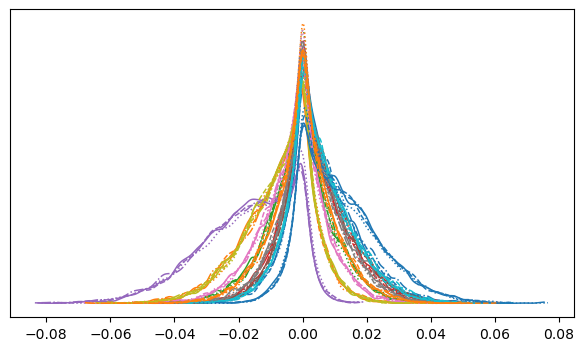

In [36]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()